# By Vinayak Lal

# Unsupervised Learning

Unsupervised learning is where you only have input data (X) and no corresponding output variables.

The goal for unsupervised learning is to model the underlying structure or distribution in the data in order to learn more about the data.

These are called unsupervised learning because unlike supervised learning above there is no correct answers and there is no teacher. Algorithms are left to their own devises to discover and present the interesting structure in the data.

Unsupervised learning problems can be further grouped into clustering and association problems.

## 1. Clustering: 

A clustering problem is where you want to discover the inherent groupings in the data, such as grouping customers by purchasing behavior.
![image.png](c1.png)

### Clustering Types
1. Hierarchical clustering
2. K-means clustering
3. Principal Component Analysis
4. Singular Value Decomposition
5. Independent Component Analysis
6. Mean Shift Clustering

## 2. Association

Association rules allow you to establish associations amongst data objects inside large databases. This unsupervised technique is about discovering interesting relationships between variables in large databases. For example, people that buy a new home most likely to buy new furniture.

Other Examples:

1. A subgroup of cancer patients grouped by their gene expression measurements
2. Groups of shopper based on their browsing and purchasing histories
3. Movie group by the rating given by movies viewers

# Clustering
Clustering is the task of dividing the population or data points into a number of groups such that data points in the same groups are more similar to other data points in the same group and dissimilar to the data points in other groups. It is basically a collection of objects on the basis of similarity and dissimilarity between them.
![image.png](c2.png)

1. A cluster refers to a small group of objects.
2. Clustering is grouping those objects into clusters.
3. Inorder to learn clustering, it is important to understand the scenarios that lead to cluster different objects.
4. Clustering is dividing data points into homogeneous classes or clusters:
    1. Points in the same group are as similar as possible
    2. Points in different group are as dissimilar as possible

# KMeans Clustering
K-means clustering algorithm – It is the simplest unsupervised learning algorithm that solves clustering problem.K-means algorithm partition n observations into k clusters where each observation belongs to the cluster with the nearest mean serving as a prototype of the cluster

When k is given, the K-means algorithm can be executed in the following steps:

1. Partition of objects into k non-empty subsets
2. Identifying the cluster centroids (mean point) of the current partition.
3. Assigning each point to a specific cluster
4. Compute the distances from each point and allot points to the cluster where the distance from the centroid is minimum.
5. After re-allotting the points, find the centroid of the new cluster formed.

# Training the K Means Algorithm on Dataset
- We gather x ray images, read them as gray scale(0) and convert them into 512 x 512 shape
- We flatten the images into 512*512 x 1 shape for training
- We import the Kmeans library from scikit-learn
- We train the flatten image on the model with different values of cluster
- The different value range from 1 to n(n being the most number of clusters) so that the tumor is easily distinguishable by a color and label
- When the model is trained we note down the label value and dump the model into a physical file

In [1]:
import cv2

img=cv2.imread('test_images/0 (239).jpg',0) # 0 means load it as gray image
height,width=img.shape
imgFlatten=img.reshape(height*width,1)# to convert 512 x 512 into 260000 x 1 (matrix to data with n rows and 1 column)

In [2]:
img.shape

(512, 512)

In [4]:
imgFlatten.shape

(262144, 1)

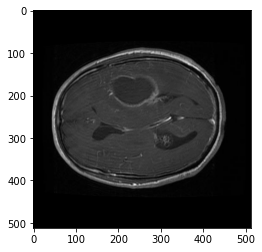

In [5]:
from matplotlib import pyplot as plt
plt.imshow(img,cmap='gray')

In [6]:
from sklearn.cluster import KMeans

model=KMeans(n_clusters=5)
model.fit(imgFlatten)

KMeans(n_clusters=5)

In [7]:
labels=model.labels_
labels2D=labels.reshape(height,width) # reshaping into 512 x 512 for visualization

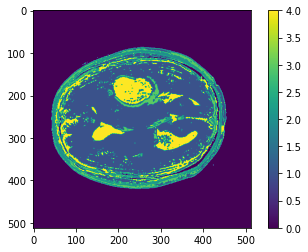

In [8]:
from matplotlib import pyplot as plt

plt.imshow(labels2D)
plt.colorbar()
plt.show()

### Tumour cells color is Yellow and Label 4

In [9]:
import joblib

joblib.dump(model,'brain_tumor_kmeans.sav')

['brain_tumor_kmeans.sav']

# Testing a single image on trained model
- Import the model 
- Read another image and make a copy of it in gray scale(0)
    - Original Image for Visualization
    - Copy Image for processing
- Flaten the image for prediction
- Predict the labels on the flatenimage
- Reconvert the image into original width and height for visualization
- We make a Binary array to have values in 1(tumor label color) and 0(all label color excluding tumor label)
- Convert this Binary array into OpenCv supported (uint8) datatype
- We make a Kernel of 5x5 matrix 
- We then perform Image Morphological proccess called Erosin to remove the excess white spots in the image except the one represnted by tumor
- We then identify all the closed areas(contours) and extract them
- We then filter out the contours will area larger than 500 or 1000 (representing the area of tumor contour)
- We then bound the tumour contour in a rectangle box and a label to it

In [10]:
import joblib

model=joblib.load('brain_tumor_kmeans.sav')
tumorLabel=4

In [11]:
import cv2

imagePath='test_images/0 (237).jpg' # another image

imgOriginal=cv2.imread(imagePath) # reading image
img=cv2.imread(imagePath,0) # reading image in gray color 
height,width=img.shape # heigh and width of image
imgFlatten=img.reshape(height*width,1) # Flatten the image

In [12]:
labels=model.predict(imgFlatten) # predict on the flatten image
labels2D=labels.reshape(height,width)# convert into 2d for visual

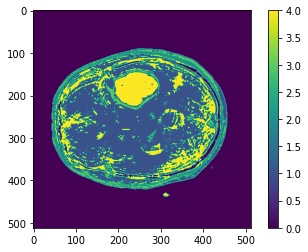

In [13]:
from matplotlib import pyplot as plt

plt.imshow(labels2D)
plt.colorbar()
plt.show()

In [14]:
mask=(labels2D==tumorLabel) # Check all pixel label equal to 4

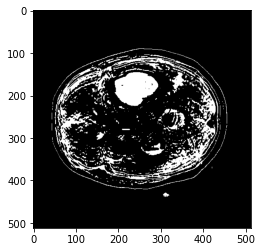

In [15]:
plt.imshow(mask,cmap='gray')
plt.show()

#### OpenCV does not recognize binary array as image

In [18]:
import numpy as np
tumorextracted = np.array((mask*255),dtype=np.uint8) # uint8 is the size that opencv supports

#### Erosion Image Morphological Process

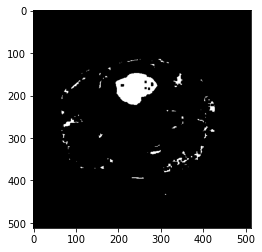

In [19]:
#morphological operations -- unwanted white pixels -- erosion is used -- clear the images by going through image and when a big chunk of white block appers it keeps it and removes all small white spots
kernel = np.ones((5,5),np.uint8) #Square values -- Matrix of 3x3
tumorextracted = cv2.erode(tumorextracted,kernel,iterations=1) #kernel goes through image and each loop the middle value will be assigned black(when atleast 1 kernel block is black) or white(when all the blocks of kernel are white) -- 

plt.imshow(tumorextracted,cmap='gray') #OpenCV supported image
plt.show()

In [20]:
contours, hierarchy = cv2.findContours(tumorextracted, cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE) #Contours of Binary Image
print('no. contours:',len(contours))

for cnt in contours:
    #cv2.drawContours(frame, [cnt], 0, (0,255,255), 3)
    area=cv2.contourArea(cnt)
    #print(area)
    if(area>500):
        x,y,w,h = cv2.boundingRect(cnt)
        cv2.rectangle(imgOriginal,(x,y),(x+w,y+h),(0,255,0),2)
        cv2.rectangle(imgOriginal,(x,y),(x+120,y-40),(0,255,0),-1)
        cv2.putText(imgOriginal,"TUMOR",(x+10,y-10),cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2)

no. contours: 87


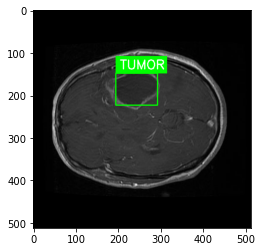

In [21]:
plt.imshow(imgOriginal,cmap='gray')
plt.show()

# Testing the whole folder

In [27]:
import cv2
import os
import numpy as np

image_names=os.listdir('test_images') # Test image Direcory

for img_name in image_names:
    
    img_path=os.path.join('test_images',img_name) # take each image path

    imgOriginal=cv2.imread(img_path)# read the image -- Original image
    img=cv2.imread(img_path,0)# read in gray scale -- Processing image
    height,width=img.shape # Take the size of image in n x m format
    print('img_shape:',img.shape)
    imgFlatten=img.reshape(height*width,1) # Flatten the image into n*m x 1 format
    print('imgFlatten.shape:',imgFlatten.shape)

    labels=model.predict(imgFlatten) # Predict the image labels from 0 to 4
    labels2D=labels.reshape(height,width) # reshape to visualize in n x m format

    mask=(labels2D==tumorLabel) # Take only the part of image that has Label 4

    tumorExtracted=np.array((mask*255),dtype=np.uint8) #converting the binary array into a opencv supported image

    kernel = np.ones((5,5), np.uint8) # create a 5x5 matrix for erosion
    tumorExtracted = cv2.erode(tumorExtracted, kernel, iterations=1) # do erosion for cleaning of image

    contours, hierarchy = cv2.findContours(tumorExtracted, cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)# Detect the contours
    print('no. contours:',len(contours))
    #cv2.drawContours(imgOriginal, contours, -1, (0,255,255), 3)

    for cnt in contours:

        area=cv2.contourArea(cnt) # calculate the area in contours
        if(area>1000):
            cv2.drawContours(imgOriginal, [cnt], -1, (0,255,255), 3)# drawing the needed contour
            x,y,w,h = cv2.boundingRect(cnt) # getting the shape of rectangle that fits the contour
            cv2.rectangle(imgOriginal,(x,y),(x+w,y+h),(0,255,0),2) #drawing the rectangle
            cv2.rectangle(imgOriginal,(x,y),(x+120,y-40),(0,255,0),-1) #drawing the box for text
            cv2.putText(imgOriginal,"TUMOR",(x+10,y-10),cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2) # writing the text in the box

    cv2.imshow('LIVE',imgOriginal)
    cv2.waitKey(2000)
    cv2.destroyAllWindows()

img_shape: (512, 512)
imgFlatten.shape: (262144, 1)
no. contours: 111
img_shape: (512, 512)
imgFlatten.shape: (262144, 1)
no. contours: 157
img_shape: (512, 512)
imgFlatten.shape: (262144, 1)
no. contours: 156
img_shape: (512, 512)
imgFlatten.shape: (262144, 1)
no. contours: 136
img_shape: (512, 512)
imgFlatten.shape: (262144, 1)
no. contours: 151
img_shape: (512, 512)
imgFlatten.shape: (262144, 1)
no. contours: 121
img_shape: (512, 512)
imgFlatten.shape: (262144, 1)
no. contours: 133
img_shape: (512, 512)
imgFlatten.shape: (262144, 1)
no. contours: 129
img_shape: (512, 512)
imgFlatten.shape: (262144, 1)
no. contours: 138
img_shape: (512, 512)
imgFlatten.shape: (262144, 1)
no. contours: 98
img_shape: (512, 512)
imgFlatten.shape: (262144, 1)
no. contours: 87
img_shape: (512, 512)
imgFlatten.shape: (262144, 1)
no. contours: 29
img_shape: (512, 512)
imgFlatten.shape: (262144, 1)
no. contours: 64
